In [1]:
student_name = "Guangyao Li"
student_id = "45496919"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline

In [4]:
test= pd.read_csv('testing.csv')
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [5]:
train = pd.read_csv('training.csv')
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [6]:
df = pd.merge(train, test, left_index=True, right_index=True, how='outer')
df.head()

,date_x,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,...,Press_mm_hg_y,RH_out_y,Windspeed_y,Visibility_y,Tdewpoint_y,rv1_y,rv2_y,NSM_y,WeekStatus_y,Day_of_week_y
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000.0,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800.0,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200.0,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800.0,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200.0,Weekday,Monday


In [7]:
df.shape

(14803, 64)

##  Appliances energy consumption measurement for a year

Text(0, 0.5, 'Appliances Wh')

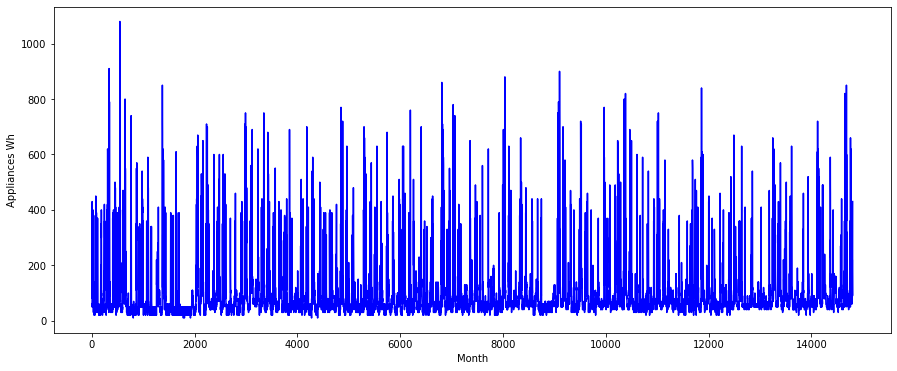

In [8]:
#setup graph figure
plt.figure(figsize = (15,6))
#color
df['Appliances_x'].plot(color = 'blue')
#label
month = {'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'};
plt.xlabel('Month')
plt.ylabel('Appliances Wh')

 The above graph shows the whole period of appliances energy consumption measurement

##  Appliances energy consumption measurement for a week

Text(0, 0.5, 'Appliances Wh')

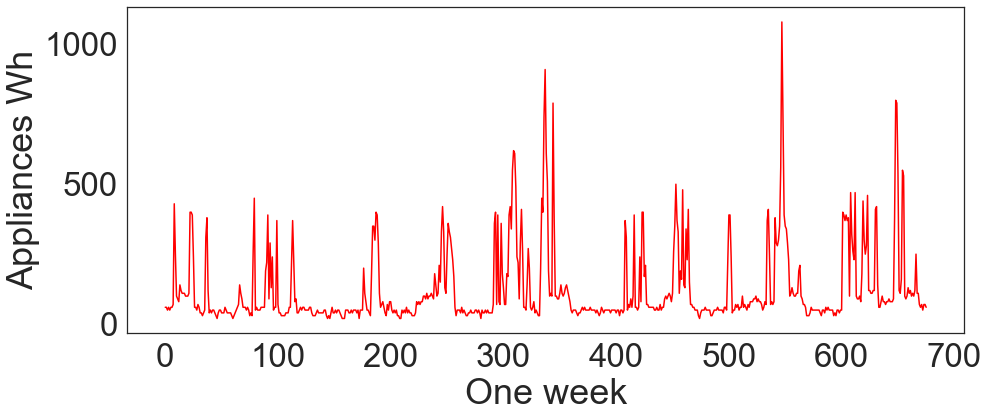

In [260]:
#setup figure
plt.figure(figsize = (15,6))
#setup the period of one week
Appliances_week = df.loc[(df.date_x >= '2016-01-11') & (df.date_x <= '2016-01-18')]
Appliances_week['Appliances_x'].plot(color = 'red')
#label
month = {'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'};
plt.xlabel('One week')
plt.ylabel('Appliances Wh')

The above graph shows the first week of appliances energy consumption.

## Appliances energy consumption histogram distribution

Text(0.5, 0, 'Appliances Wh')

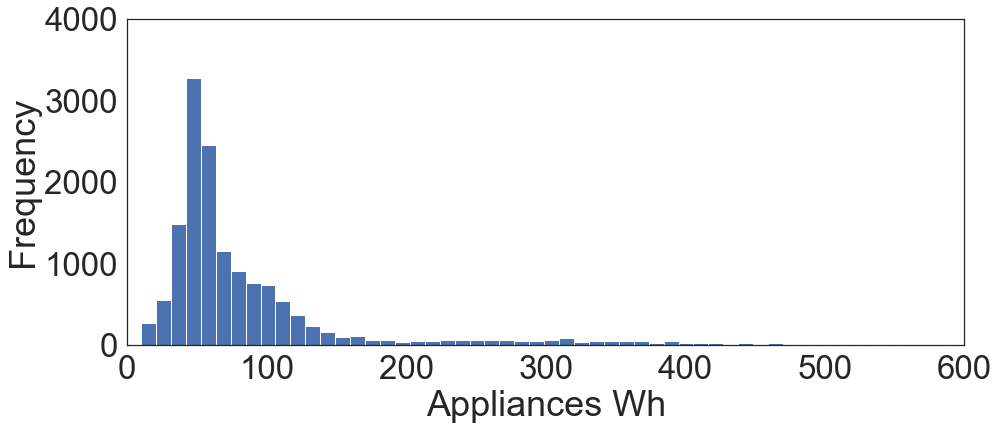

In [261]:
#setup histogram's parameter
df['Appliances_x'].plot.hist(xlim=(0,600),ylim=(0,4000),figsize=(15,6),bins=100)
#label
plt.xlabel('Appliances Wh')

## Appliances energy consumption boxplot

The histogram shows the frequency of energy consumption with appliances WH. The plot is right-skewed, which means many points left of the mean. Most of appliances' consume from 20 to 140 Wh.

Text(0, 0.5, 'Frequency')

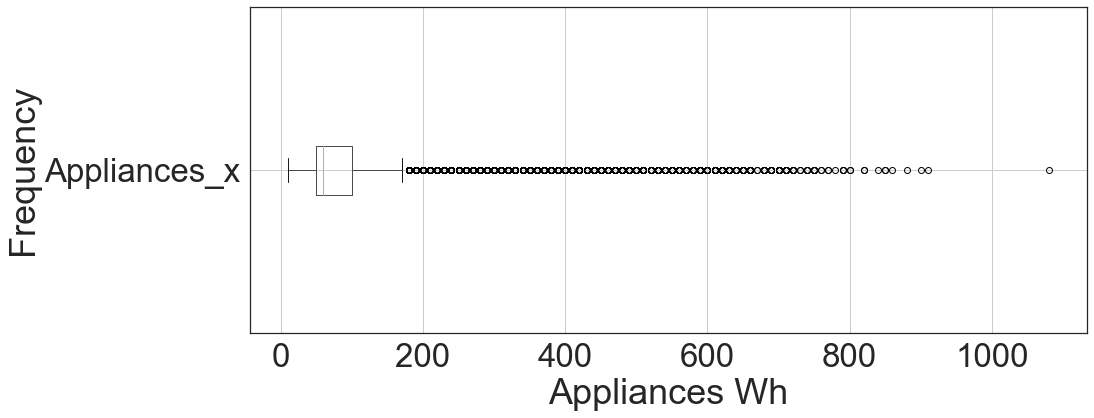

In [262]:
#setup boxplot's parameter
df.boxplot(column=['Appliances_x'],vert=False,figsize=(15,6))
#label
plt.xlabel("Appliances Wh")
plt.ylabel("Frequency")

Boxplot shows the location of the median with the black line, and median locates on around 50~65 Wh

##  Hourly heat map 

In [263]:
#grab data
df.date_x.head()

0    2016-01-11 17:00:00
1    2016-01-11 17:10:00
2    2016-01-11 17:20:00
3    2016-01-11 17:40:00
4    2016-01-11 17:50:00
Name: date_x, dtype: object

In [264]:
df.date_x= pd.to_datetime(df['date_x'])
df.date_x.head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:40:00
4   2016-01-11 17:50:00
Name: date_x, dtype: datetime64[ns]

In [265]:
#assign day of week
df.Day_of_week = df['date_x'].dt.day_name()


In [266]:
#assign datehour
df.datehour = df['date_x'].dt.hour

In [267]:
#Classify each month
Onemonth = df.loc[(df.date_x >= '2016-01-01') & (df.date_x <= '2016-01-28')]
Twomonth = df.loc[(df.date_x >= '2016-02-01') & (df.date_x <= '2016-02-28')]
Threemonth = df.loc[(df.date_x >= '2016-03-01') & (df.date_x <= '2016-03-28')]
Fourmonth = df.loc[(df.date_x >= '2016-04-01') & (df.date_x <= '2016-04-28')]


In [268]:
# operation from unstack
Onemonth3 = Onemonth2.unstack(level=0)
Twomonth3 = Twomonth2.unstack(level=0)
Threemonth3 = Threemonth2.unstack(level=0)
Fourmonth3 = Fourmonth2.unstack(level=0)

In [269]:
#Conform Series to new index
Onemonth3 = Onemonth3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Twomonth3 = Twomonth3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Threemonth3 = Threemonth3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)
Fourmonth3 = Fourmonth3.reindex(labels=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],axis=1,level=1)

In [270]:
Day_shortnames = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat'] 

[Text(9.499999999999996, 0.5, 'Hour of Day'), Text(0.5, 90.5, 'Day of week')]

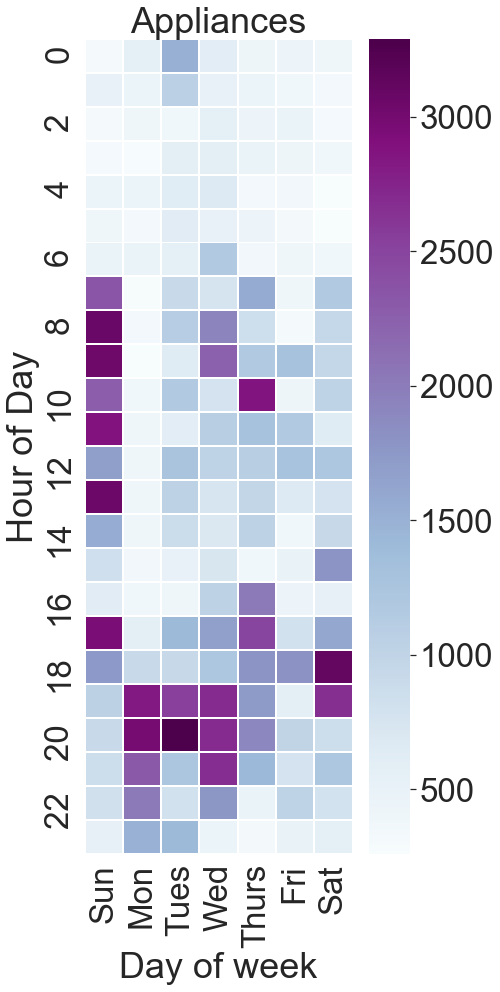

In [271]:
#First month performance
f,g1 =plt.subplots(figsize=(6,15))
f,g1.title.set_text('Appliances')
g1=sb.heatmap(Onemonth3, cmap="BuPu",linewidths=1, xticklabels=Day_shortnames)
g1.set(xlabel = 'Day of week',ylabel='Hour of Day')

[Text(9.499999999999996, 0.5, 'Hour of Day'), Text(0.5, 90.5, 'Day of week')]

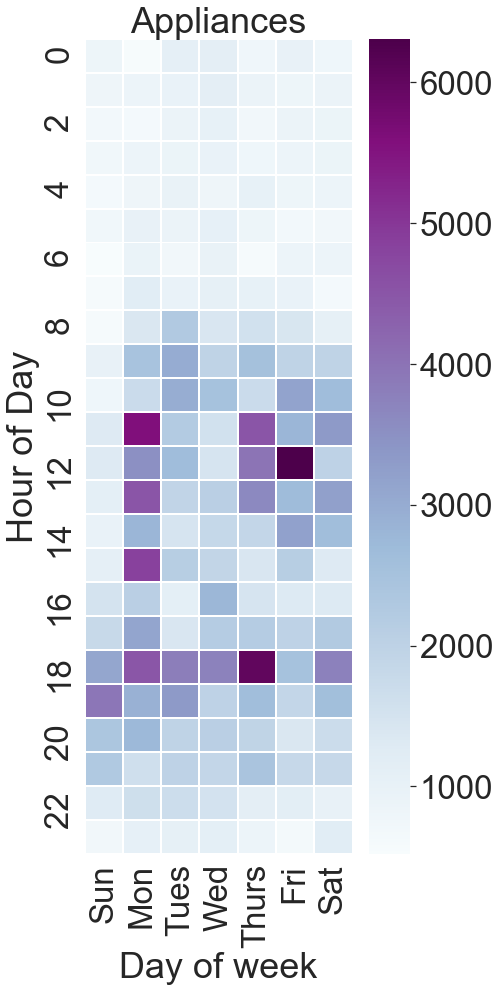

In [272]:
#Second month performance
f,g2 =plt.subplots(figsize=(6,15))
f,g2.title.set_text('Appliances')
g2=sb.heatmap(Twomonth3,cmap="BuPu",linewidths=1, xticklabels=Day_shortnames)
g2.set(xlabel = 'Day of week',ylabel='Hour of Day')


[Text(9.499999999999996, 0.5, 'Hour of Day'), Text(0.5, 90.5, 'Day of week')]

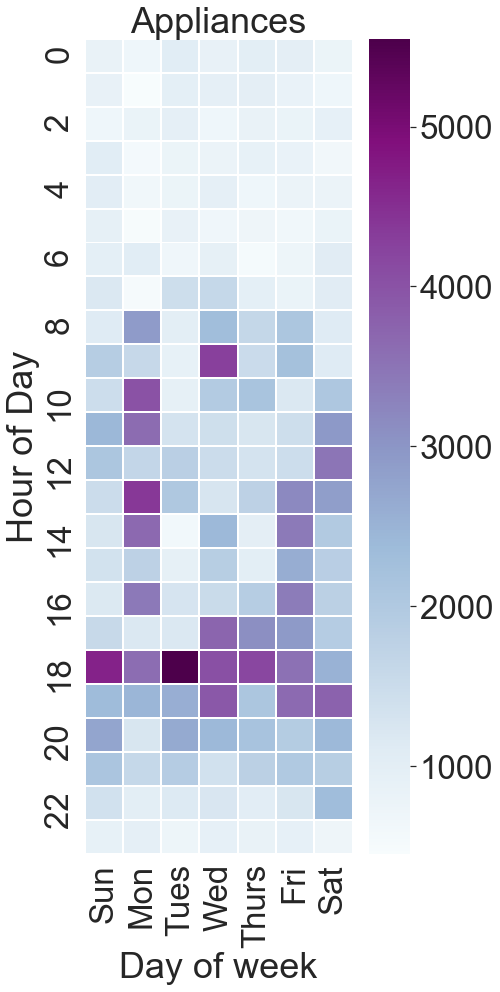

In [273]:
#Third month performance
f,g3 =plt.subplots(figsize=(6,15))
f,g3.title.set_text('Appliances')
g3=sb.heatmap(Threemonth3,cmap="BuPu",linewidths=1, xticklabels=Day_shortnames)
g3.set(xlabel = 'Day of week',ylabel='Hour of Day')


[Text(9.499999999999996, 0.5, 'Hour of Day'), Text(0.5, 90.5, 'Day of week')]

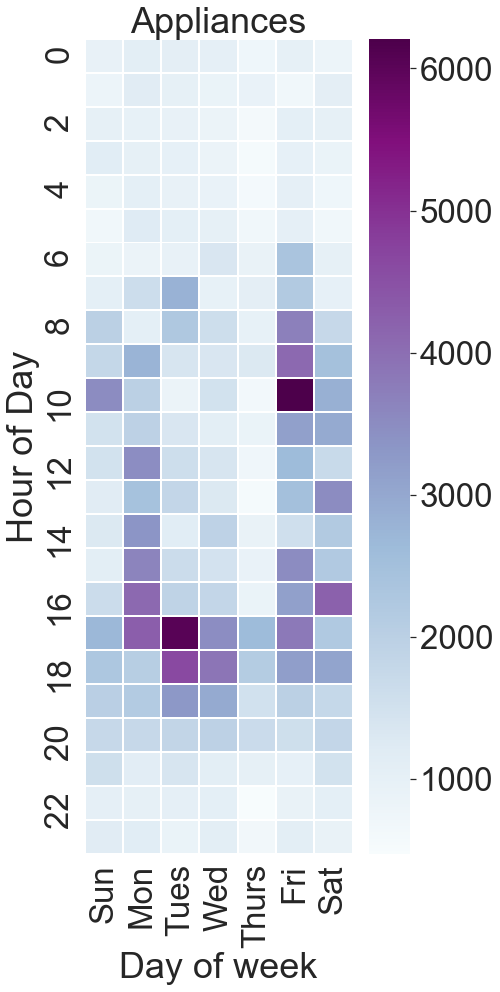

In [274]:
#Fourth month performance
f,g4 =plt.subplots(figsize=(6,15))
f,g4.title.set_text('Appliances')
g4=sb.heatmap(Fourmonth3,cmap="BuPu",linewidths=1, xticklabels=Day_shortnames)
g4.set(xlabel = 'Day of week',ylabel='Hour of Day')

In general, the app wh start to increase from 7am, another appliances energy consumption peak isfrom 6pm to night. On first month, Sunday has more wh from 7am to 1pm than others and more wh at night; Second month's has more wh exists on Monday daytime; Third month's looks like as usual; Fourth month's  consume a significant number on Friday morning.

## Pairplot

In [275]:
#pickup the factors Appliances,lights T1, RH1,T2, RH2, T3, RH3. T1 and RH1 
pairplot = df[['Appliances_x','lights_x','T1_x','RH_1_x','T2_x','RH_2_x','T3_x','RH_3_x']]

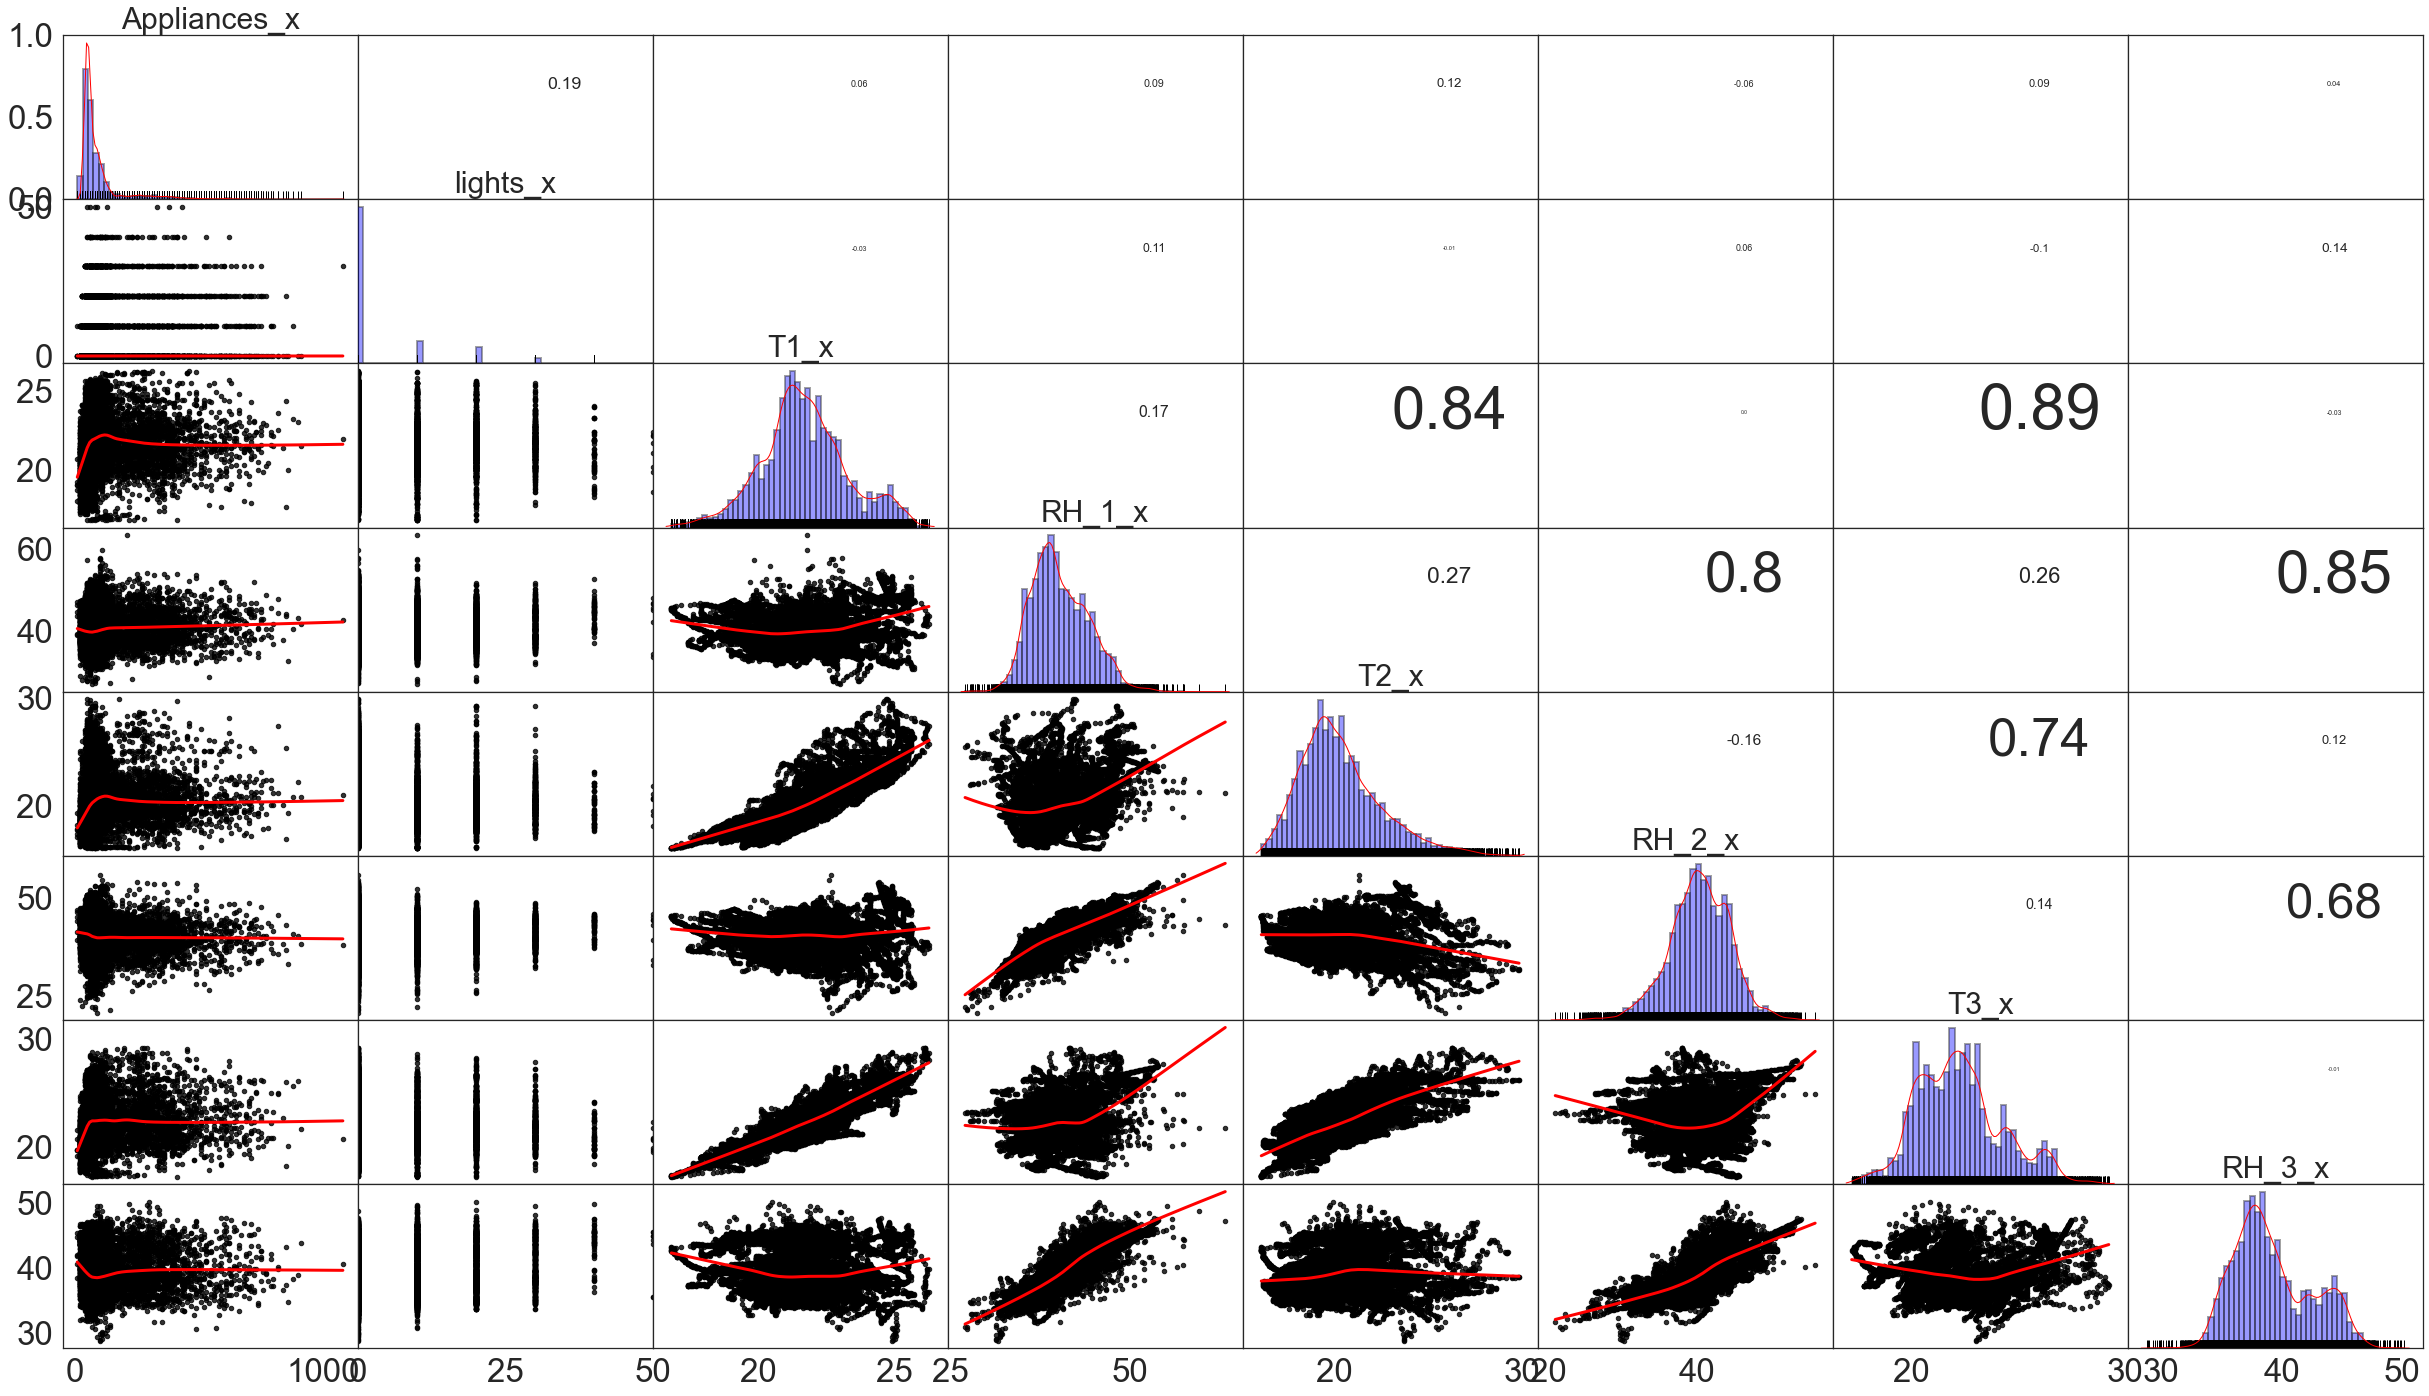

In [276]:
#import stats
from scipy import stats
#def corrdot 
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
#size    
    font_size = abs(corr_r) * 65 + 5
    marker_size = abs(corr_r) * 1000
    gca = plt.gca()
    gca.annotate(corr_text, [.7, .7,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)


sb.set(style='white', font_scale=3)
grid = sb.PairGrid(pairplot, aspect=1.7, diag_sharey=False, despine=False)
grid.map_lower(sb.regplot, lowess=True, ci=False,
            line_kws={'color':'red', 'lw': 3},
            scatter_kws={'color':'black', 's': 20})
grid.map_diag(sb.distplot, color='black',
           kde_kws={'color':'red', 'cut': 0.9, 'lw': 1},
           hist_kws={'histtype':'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'blue'})
grid.map_diag(sb.rugplot, color='black')
grid.map_upper(corrdot)
grid.fig.subplots_adjust(wspace=0, hspace=0)

# Add titles to the diagonal subplots
for gca, col in zip(np.diag(grid.axes), pairplot.columns):
    gca.set_title(col, y=0.75, fontsize=30)
# Remove the labels
for gca in grid.axes.flatten():
    gca.set_ylabel('')
    gca.set_xlabel('')



This above pairplot shows that the largest correlation is between T1 and T3, which is 0.89. The second largest correlation is between RH3 and RH1,reaching 0.85. Also, T1 and T2 have good pair. A strong positive correlation is
found with T1 and T2, T1 and T3, T2 and T3, RH1 and RH3. For the kitchen and living room conditions, the correlations are not outstanding between temperature and humidity. 